In [1]:
%%js
MathJax.Hub.Config({
  TeX: { 
    equationNumbers: { autoNumber: "AMS" } 
    }
});


<IPython.core.display.Javascript object>

# Моделирование
## Распределение амплитуд

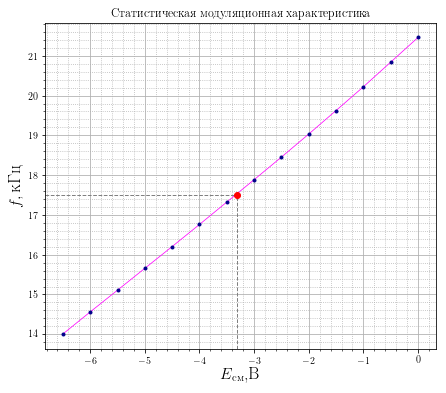

In [11]:
from pylab import *
rcParams['figure.figsize'] = [7, 6]
rcParams['axes.labelsize'] = 20
from math import pi
from IPython.display import display, Math,Latex
import pandas as pd
import time

from pylab import *
from matplotlib import rc
import os.path as path
rc('text', usetex=True)
rc('text.latex', preamble=[r'\usepackage[russian]{babel}',
                           r'\usepackage{amsmath}',
                           r'\usepackage{amssymb}'])

rc('font', family='serif')
y=[21.46,20.84,20.22,19.624,19.032,18.453,17.885,17.323,16.76,16.205,15.658,15.109,14.562,14.007] 
x = np.linspace(0,-6.5, 14) 

plt.axvline(x=-3.32,ymin=0,ymax=(17.5-min(y))/(max(y)-min(y)),
			linewidth=1,linestyle='--',color='grey') 
plt.axhline(y=17.5,xmin=0,xmax=(-3.32-min(x))/(max(x)-min(x)),
			linewidth=1,linestyle='--',color='grey') 
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.title('Статистическая модуляционная характеристика') 
plt.ylabel(r'$f,\text{кГц}$',fontsize=16) 
plt.xlabel(r'$E_{\text{см}}$,В',fontsize=16) 
plt.plot(x, y,'magenta',linewidth=0.75) 
plt.plot(x, y,'.',color='darkblue') 
plt.plot(-3.32,17.5,'ro')
plt.savefig('example.pdf')
plt.show()


$\renewcommand{\phi}{\varphi}$
Для моделирования случайной поверхности $\Sigma(\vec{r},t)$ используется ее представление в виде суперпозиции плоских волн (гармоник) с различными частотами $\omega_n$ и случайными фазами $\Psi_{nm}$, бегущих под разными азимутальными углами $\phi_m$:
$$\begin{equation*}
    \Sigma(\vec{r},t)=\sum\limits_{n=1}^N\sum_{m=1}^M A_n
    cos(\omega_nt+\vec{k_n}\vec{r}+\Psi_{nm})\cdot\Phi_{nm}
    (\omega_n,\phi_m)
    \label{eq:1}
\end{equation*}$$
Далее будут приведены основные соотношения, необходимые для этого уравнения

In [3]:
def find_decision(omega):
    P = 9.8*1000.0/0.074;
    Q = -1000.0*omega**2/0.074;
    x1= -Q/2.0 + sqrt( (Q/2)**2 + (P/3)**3 )
    x2= -Q/2.0 - sqrt( (Q/2)**2 + (P/3)**3 )
    k=x1**(1/3)-(-x2)**(1/3)
    return k

def det(k): 
#    Функция возвращает детерминант при переходе от частоты к 
#волновым числам по полному дисперсионному
    det=(9.8+3*k**2*0.074/1000)/(2*sqrt(9.8*k+k**3*0.074/1000) )
    return det

Дисперсионное уравнение $\omega(k)=\sqrt{ gk+0.074\frac{k}{1000} }$

Вычисление безразмерной частоты $\tilde{\omega}$ по безразмерному разгону $\tilde{x}$ 

Вычисление безразмерных коэффициентов $\gamma$ и $\alpha$

Время выполнения --- 0.47870492935180664 c


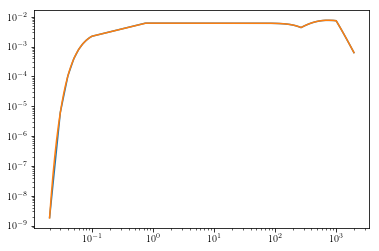

In [4]:
global g
g=9.81
def k_max(omega_max):
    k_max=omega_max**2/g
    return k_max

def omega_k(k): # Пересчет волнового числа в частоту по полному дисперсионному
    omega_k=(g*k+0.074*k**3/1000)**(1/2) #Сложное дисперсионное
    return omega_k  

def full_spectrum(k,x=20170, long_calculate=True):
    def JONSWAP(k):
        if k<=k_m:
            sigma=0.07
        else:
            sigma=0.09
        Sw=(
            Alpha(x)/2*k**(-3)*exp(-1.25*(k_m/k)**2 )*
            Gamma(x)**(exp(- ( sqrt(k/k_m)-1)**2 / (2*sigma**2) ))
           )
        return Sw

    def Gamma(x):
        if x>=20170:
            return 1
        gamma=(
               +5.253660929
               +0.000107622*x
               -0.03778776*sqrt(x)
               -162.9834653/sqrt(x)
               +253251.456472*x**(-3/2)
              )
        return gamma

    def Alpha(x):
        if x>=20170:
            return 0.0081
        alpha=array([],dtype='float64')
        alpha=[( 
               +0.0311937
               -0.00232774*log(x)
               -8367.8678786/x**2
               +4.5114599e+300*exp(-x)*1e+300*1e+17
    #            +4.5114599e+17*exp(-x)
              )]
        return alpha[0]

    def Omega(x): #Вычисление безразмерной частоты по безразмерному разгону
        if x>=20170:
            return 0.835
        omega_tilde=(0.61826357843576103 
                     + 3.52883010586243843e-06*x
                     - 0.00197508032233982112*sqrt(x)
                     + 62.5540113059129759/sqrt(x)
                     - 290.214120684236224/x
        )
        return omega_tilde

    def spectrum1(k):


        omega0=omega_k(limit_k[0])
        beta0= JONSWAP(limit_k[0])*omega0**4/det(limit_k[0])

        omega0=omega_k(k)

        return beta0/omega0**4*det(k)

    def spectrum2(k):


        omega0=omega_k(limit_k[1])
        beta0= spectrum1(limit_k[1])*omega0**5/det(limit_k[1])

        omega0=omega_k(k)

        return beta0/omega0**5*det(k)

    def spectrum3(k):


        omega0=omega_k(limit_k[2])
        beta0= spectrum2(limit_k[2])*omega0**2.7/det(limit_k[2])

        omega0=omega_k(k)

        return beta0/omega0**2.7*det(k)

    def spectrum4(k):


        omega0=omega_k(limit_k[3])
        beta0= spectrum3(limit_k[3])*omega0**5/det(limit_k[3])

        omega0=omega_k(k)

        return beta0*det(k)/omega0**5
    
#     def spectrum(k):
#         omega0=[omega_k(limit_k[i]) for i in range(4)]
#         p=[4,5,2.7,5]
#         S=[0,0,0,0]
#         S[0]=lambda a: JONSWAP(limit_k[0]) * (omega0[0]/omega_k(a))**p[0] * det(a)/det(limit_k[0])
#         S[1]=lambda a: S[0](limit_k[1])    * (omega0[1]/omega_k(a))**p[1] * det(a)/det(limit_k[1])
#         S[2]=lambda a: S[1](limit_k[2])    * (omega0[2]/omega_k(a))**p[2] * det(a)/det(limit_k[2])
#         S[3]=lambda a: S[2](limit_k[3])    * (omega0[3]/omega_k(a))**p[3] * det(a)/det(limit_k[3])
#         spectrum=zeros((len(k),4))
#         for j in range(len(k)):
#             for i in range(4):
#                 spectrum[j][i]=S[i](k[j])
#         return spectrum
    
    gamma,alpha,omega_m=Gamma(x),Alpha(x),Omega(x)
    
    try:
        full_spectrum=zeros(len(k))
    except:
        full_spectrum=[0]
        k=[k]
    if long_calculate==False:
        k=logspace(log10(k[0]),log10(k[-1]),1000)
        
    omega=omega_m*g/U10
    global k_m
    k_m=k_max(omega)
    limit_1= 1.2   #{ НАЧИНАЕТСЯ  - 1/(W**4) }
    limit_2=(
             +0.371347584096022408 
             + 0.290241610467870486*U10
             + 0.290178032985796564/U10
            )
    limit_3= 270.0 #{ НАЧИНАЕТСЯ 1/W**2.7 }
    limit_4= 1020.0 #{ НАЧИНАЕТСЯ 1/W*5 }

    limit_k=np.zeros(4)
    limit_k[0]=find_decision(limit_1*omega)
    limit_k[1]=find_decision(limit_2*omega)
    limit_k[2]=limit_3
    limit_k[3]=limit_4

    for i in range(len(k)):
        if k[i] <= limit_k[0]:
            full_spectrum[i] =  JONSWAP(k[i])
        elif k[i] <= limit_k[1]:
            full_spectrum[i] = spectrum1(k[i])
        elif k[i] <= limit_k[2]:
            full_spectrum[i] = spectrum2(k[i])
        elif k[i] <= limit_k[3]:
            full_spectrum[i] = spectrum3(k[i])
        else:
            full_spectrum[i] = spectrum4(k[i])

#     S=spectrum(k)
#     for i in range(len(k)):
#         if k[i] <= limit_k[0]:
#             full_spectrum[i] =  JONSWAP(k[i])
#         elif k[i] <= limit_k[1]:
#             full_spectrum[i] = S[i][0]
#         elif k[i] <= limit_k[2]:
#             full_spectrum[i] = S[i][1]
#         elif k[i] <= limit_k[3]:
#             full_spectrum[i] = S[i][2]
#         else:
#             full_spectrum[i] = S[i][3]

    return full_spectrum

U10=10
name='SEAWVS_1.dat'
data=pd.read_csv(name,sep='\s+')
KT=array(data['KT'])
OUR=array(data['OUR'])
loglog(KT,OUR)
k=linspace(KT[0],KT[-1],len(KT))
k=logspace(log10(k[0]),log10(k[-1]),10000)
start_time = time.time()
S=full_spectrum(k,x=20170)
print("Время выполнения --- %s c" % (time.time() - start_time))
loglog(k,k**3*S)


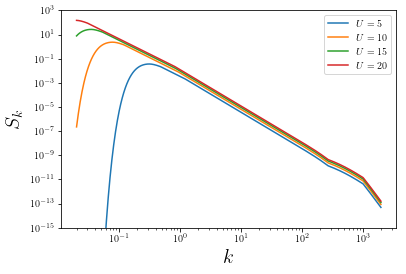

In [5]:
x=15000

U10=5
k=logspace(log10(k[0]),log10(k[-1]),1000)
C=full_spectrum(k,x)
loglog(k,C,label='$U=5$')

U10=10
k=logspace(log10(k[0]),log10(k[-1]),1000)
C=full_spectrum(k,x)
loglog(k,C,label='$U=10$')

U10=15
k=logspace(log10(k[0]),log10(k[-1]),1000)
C=full_spectrum(k,x)
loglog(k,C,label='$U=15$')

U10=20
k=logspace(log10(k[0]),log10(k[-1]),1000)
C=full_spectrum(k,x)
loglog(k,C,label='$U=20$')
legend()

xlabel('$k$')
ylabel('$S_{k}$')
ylim((10**(-15),1000))
show()

In [6]:
xx=arange(1430,20000,3000)
U10=10
for n in xx:
    x=n
    k=logspace(log10(k[0]),log10(k[-1]),1000)
    C=full_spectrum(k,n)
    loglog(k,C,label='$\\~{x}=$'+'{0}'.format(x))

ylim([10**-30,10])
xlabel('$k$')
ylabel('$S_{k}$')
legend()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001543DC526A8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'$\\\\~{x}=$1430'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018/W32TeX) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(c:/Users/ponur/.matplotlib/tex.cache/6770593da327503a8267ba0d775bb62b.tex
LaTeX2e <2018-04-01> patch level 5
(c:/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(c:/texlive/2018/texmf-dist/tex/latex/base/size10.clo))
(c:/texlive/2018/texmf-dist/tex/latex/type1cm/type1cm.sty)
(c:/texlive/2018/texmf-dist/tex/latex/base/textcomp.sty
(c:/texlive/2018/texmf-dist/tex/latex/base/ts1enc.def
(c:/texlive/2018/texmf-dist/tex/latex/base/ts1enc.dfu)))
(c:/texlive/2018/texmf-dist/tex/latex/base/inputenc.sty)
(c:/texlive/2018/texmf-dist/tex/generic/babel/babel.sty
(c:/texlive/2018/texmf-dist/tex/generic/babel/switch.def)
(c:/texlive/2018/texmf-dist/tex/generic/babel-russian/russianb.ldf
(c:/texlive/2018/texmf-dist/tex/generic/babel/babel.def
(c:/texlive/2018/texmf-dist/tex/generic/babel/txtbabel.def))

Package babel Warning: No Cyrillic font encoding has been loaded so far.
(babel)                A font encoding should be declared before babel.
(babel)                Default `T2A' encoding will be loaded  on input line 74.


(c:/texlive/2018/texmf-dist/tex/latex/cyrillic/t2aenc.def
(c:/texlive/2018/texmf-dist/tex/latex/base/t2aenc.dfu))))
(c:/texlive/2018/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(c:/texlive/2018/texmf-dist/tex/latex/amsmath/amstext.sty
(c:/texlive/2018/texmf-dist/tex/latex/amsmath/amsgen.sty))
(c:/texlive/2018/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(c:/texlive/2018/texmf-dist/tex/latex/amsmath/amsopn.sty))
(c:/texlive/2018/texmf-dist/tex/latex/amsfonts/amssymb.sty
(c:/texlive/2018/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(c:/texlive/2018/texmf-dist/tex/latex/geometry/geometry.sty
(c:/texlive/2018/texmf-dist/tex/latex/graphics/keyval.sty)
(c:/texlive/2018/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(c:/texlive/2018/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(c:/texlive/2018/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file 6770593da327503a8267ba0d775bb62b.aux.
(c:/texlive/2018/texmf-dist/tex/latex/base/ts1cmr.fd)
(c:/texlive/2018/texmf-dist/tex/latex/cyrillic/t2acmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

LaTeX Warning: Command \~ invalid in math mode on input line 16.

! Please use \mathaccent for accents in math mode.
\add@accent ...@spacefactor \spacefactor }\accent 
                                                  #1 #2\egroup \spacefactor ...
l.16 ...ize{10.000000}{12.500000}{\rmfamily $\~{x}
                                                  =$1430}
No pages of output.
Transcript written on 6770593da327503a8267ba0d775bb62b.log.




RuntimeError: latex was not able to process the following string:
b'$\\\\~{x}=$1430'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018/W32TeX) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(c:/Users/ponur/.matplotlib/tex.cache/6770593da327503a8267ba0d775bb62b.tex
LaTeX2e <2018-04-01> patch level 5
(c:/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(c:/texlive/2018/texmf-dist/tex/latex/base/size10.clo))
(c:/texlive/2018/texmf-dist/tex/latex/type1cm/type1cm.sty)
(c:/texlive/2018/texmf-dist/tex/latex/base/textcomp.sty
(c:/texlive/2018/texmf-dist/tex/latex/base/ts1enc.def
(c:/texlive/2018/texmf-dist/tex/latex/base/ts1enc.dfu)))
(c:/texlive/2018/texmf-dist/tex/latex/base/inputenc.sty)
(c:/texlive/2018/texmf-dist/tex/generic/babel/babel.sty
(c:/texlive/2018/texmf-dist/tex/generic/babel/switch.def)
(c:/texlive/2018/texmf-dist/tex/generic/babel-russian/russianb.ldf
(c:/texlive/2018/texmf-dist/tex/generic/babel/babel.def
(c:/texlive/2018/texmf-dist/tex/generic/babel/txtbabel.def))

Package babel Warning: No Cyrillic font encoding has been loaded so far.
(babel)                A font encoding should be declared before babel.
(babel)                Default `T2A' encoding will be loaded  on input line 74.


(c:/texlive/2018/texmf-dist/tex/latex/cyrillic/t2aenc.def
(c:/texlive/2018/texmf-dist/tex/latex/base/t2aenc.dfu))))
(c:/texlive/2018/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(c:/texlive/2018/texmf-dist/tex/latex/amsmath/amstext.sty
(c:/texlive/2018/texmf-dist/tex/latex/amsmath/amsgen.sty))
(c:/texlive/2018/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(c:/texlive/2018/texmf-dist/tex/latex/amsmath/amsopn.sty))
(c:/texlive/2018/texmf-dist/tex/latex/amsfonts/amssymb.sty
(c:/texlive/2018/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(c:/texlive/2018/texmf-dist/tex/latex/geometry/geometry.sty
(c:/texlive/2018/texmf-dist/tex/latex/graphics/keyval.sty)
(c:/texlive/2018/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(c:/texlive/2018/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(c:/texlive/2018/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./6770593da327503a8267ba0d775bb62b.aux)
(c:/texlive/2018/texmf-dist/tex/latex/base/ts1cmr.fd)
(c:/texlive/2018/texmf-dist/tex/latex/cyrillic/t2acmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

LaTeX Warning: Command \~ invalid in math mode on input line 16.

! Please use \mathaccent for accents in math mode.
\add@accent ...@spacefactor \spacefactor }\accent 
                                                  #1 #2\egroup \spacefactor ...
l.16 ...ize{10.000000}{12.500000}{\rmfamily $\~{x}
                                                  =$1430}
No pages of output.
Transcript written on 6770593da327503a8267ba0d775bb62b.log.




<Figure size 432x288 with 1 Axes>

## Угловое распределение
Угловое распределение $\Phi_{\omega}$ описывается следующей формулой:
$$\Phi_{\omega}=A\cdot\frac{2}{\exp(2B\phi)+\exp(-2B\phi)}=\frac{A}{\cosh(2B\phi)},\, -\pi\leq\phi\leq\pi$$
Где $B=10^b$, а b описывается следующей формулой:
$$b=-0.28+0.65\exp\left\{-0.75\log(\frac{k}{k_m})\right\}+0.01\exp\left\{0.2+0.7\lg(\frac{k}{k_m})\right\}$$

<IPython.core.display.Math object>

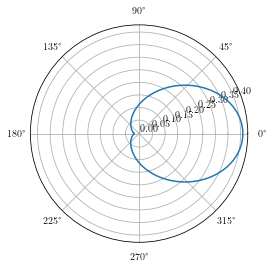

In [7]:
def B(k):
    def b(k):
        b=(
            -0.28+0.65*exp(-0.75*log(k/k_m))
            +0.01*exp(-0.2+0.7*log10(k/k_m))  
          )          
        return b
    B=10**b(k)
    return B

def Normalization(B):
    Normalization=B/arctan(sinh(2*pi*B))
    return Normalization

def Phi(k,phi):
    try:
        Phi=zeros((len(k),len(phi)))
        for i in range(len(k)):
            B0=B(k[i])
            A0=Normalization(B0)
            Phi[i]=A0/cosh(2*B0*phi)
    except:
        B0=B(k)
        A0=Normalization(B0)
        Phi=A0/cosh(2*B0*phi)
    return Phi

x=linspace(-pi,pi,100)
y=Phi(100,x)
polar(x,y)

integral=trapz(y,x,dx=0.1)
display(Math
(
 r'Интеграл\,функции\,распределения:\\'
 +'\displaystyle\int\limits_{-\pi}^{\pi}'
 +'\Phi_{\omega}(\omega,\phi)d\phi'
 +'={0} \simeq  {1}'.format(integral,round(integral,3)) 
)
       )

# Для проверки

Все равно придётся считать

 
 При увеличении числа гармоник происходит
улучшение качества моделируемой поверхности, но возрастает время
счета. Поэтому, как и в случае с угловым распределением, здесь также
было выбрано компромиссное решение. Критерием была выбрана 
    близость корреляционных функций высот $ K_{\sum} (\rho)$ и наклонов вычисленных по исходному спектру $S_{\sum}(\omega)$ и по реализации поверхности $\Sigma (\vec r, t)$:
 
 $$K_{\sum}(\rho)=\int\limits_{(k)}S_{\sum}(k)\cos(k\rho)dk$$
 
 $$K_{\sum}^M(\rho)=\sum\limits_{n=1}^N \frac{A^2_n}{2}\cos(k\rho)$$
  
 $$K_{\sum\theta}(\rho)=\int\limits_{(k)}k^2S_{\sum}(k)\cos(k\rho)dk$$
   
  $$K_{\sum\theta}^M(\rho)=\sum\limits_{n=1}^N \frac{A^2_n k^2}{2}\cos(k\rho)$$

0.0
2000.982


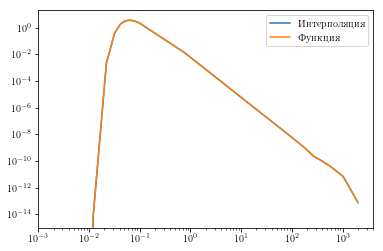

In [8]:
from scipy import interpolate
k=arange(KT[0]/10,KT[-1]+1,0.01)
S=full_spectrum(k)
full_spectrum=interpolate.interp1d(k,S)
loglog(k,full_spectrum(k),label='Интерполяция')
loglog(k,S,label='Функция')
print(norm(S-full_spectrum(k)))
print(k[-1])
legend()
k_edge=111.8-17.937*U10+3.095*U10**2+1.2656*U10**2*log(U10)+0.3141*U10*(2.5)


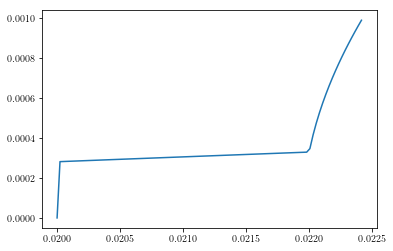

In [9]:
def angle(k,phi):
    angle=sqrt( 2*pi/100 * Phi(k,phi) )
    return angle

def amplitude(k,N):
    # k-- выбранный диапазон волновых чисел
    # N-- количество моделируемых гармоник
    k=logspace(log10(KT[0]),log10(KT[-1]),N)
    S=full_spectrum(k)
    omega=omega_k(k)
    dk=zeros(N)
#     dk[0]=(k[1]-k[0])
    for i in range(1,N):
        dk[i]=(k[i]-k[i-1])
    amplitude=sqrt(2*dk * S)
    return amplitude
N=10000
k=logspace(log10(KT[0]),log10(KT[-1]),N)
A=amplitude(k,N)
plot(k[0:100],A[0:100])

Встала задача нахождения интеграла аналитически. Для этого изначально ещё нужно выбрать оптимальное распеределение волновых чисел.

0.3397533412383567 0.3400591033071311


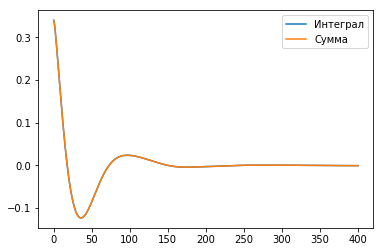

In [10]:
# print avada kedavra
from scipy.integrate import simps
from numpy.linalg import norm
U10=10

def correlation_height(k,rho):
    S=full_spectrum(k)
    integral=zeros(len(rho))
    for i in range(len(rho)):
        integral[i]=trapz(S*cos(k*rho[i]),k)
    return integral

def correlation_height_sum(k,rho,N=1000):
    f=0
    A=amplitude(k,N)
    k=logspace(log10(KT[0]),log10(KT[-1]),N)
    f=zeros(len(rho))
    for j in range(len(rho)):
            f[j]=sum( A**2/2*cos(k*rho[j]) )
    return f

    
k=logspace(log10(KT[0]),log10(KT[-1]),10000)
rho=linspace(0,400,400)
y=zeros(len(rho))
N=1000
y=correlation_height_sum(k,rho, N=6400)
y1=correlation_height(k,rho)
print(y[0],y1[0])
plot(rho,y1,label='Интеграл')
plot(rho,y,label='Сумма')
legend()



In [11]:
# print avada kedavra
def correlation_angles(k,rho):
    integral=zeros(len(rho))
    S=k**2*f(k)
    y=lambda k,rho: S*cos(k*rho)
    for i in range(len(rho)):
        integral[i]=trapz(y(k,rho[i]),x=k)
    return integral
    
def correlation_angles_sum(k,rho,N=10000):
    f=0
    A=amplitude(k,N)
    k=logspace(log10(KT[0]),log10(KT[-1]),N)
    f=zeros(len(rho))
    for j in range(len(rho)):
            f[j]=sum( k**2*A**2/2*cos(k*rho[j]) )
    return f
print(k_edge)
k=linspace(KT[0],k_edge,100000)
rho=linspace(0,400,400)
y=zeros(len(rho))
y=correlation_angles_sum(k,rho,1000)
y1=correlation_angles(k,rho)
plot(rho,y,label='Сумма')
plot(rho,y1,label='Интеграл')
legend()
print(y[0],y1[0])
plot(I)


541.1976693693264


TypeError: f() takes at least 2 positional arguments (1 given)

In [ ]:
print avada kedavra

In [ ]:
# integral=zeros(len(rho))
y=lambda k,rho: k**2*f(k)*cos(k*rho)
integral=[quad(y,KT[0],KT[-1],args=i) for i in range(300)]
plot(integral)

In [ ]:
def find_garmonics(k,rho):
#     N=100
#     k=logspace(log10(KT[0]),log10(KT[-1]),10000)
#     S=correlation_height_sum(k,rho,N)
#     I=correlation_height(k,rho)
#     while abs(norm(S-I))>0.01:
#         N*=2
#         S=correlation_height_sum(k,rho,N)
#     print('Количество гармоник для высот N=',N)
    
#     k=logspace(log10(KT[0]),log10(KT[-1]),10000)
#     S=correlation_angles_sum(k,rho,N)
#     I=correlation_angles(k,rho)
#     while abs(norm(S-I))>0.01:
#         N*=2
#         S=correlation_angles_sum(k,rho,N)
#     print('Количество гармоник для наклонов N=',N)
    return 6400

In [ ]:
from numpy import random
def model(k,phi,N):
    U10=10
    rho=linspace(0,400,400)
    A=amplitude(k,N)
    F=angle(k,phi)
    psi=array([
    [ random.uniform(0,2*pi) for j in range(100)] 
      for i in range(N)              ]) 
    
    def water(r,vec_k=array([1,0]),t=0):
        model=0
        for n in range(N):
            for m in range(100):
                model+=A[n]*cos(
                    k[n]*(r[0]*vec_k[0]+r[1]*vec_k[1])+psi[n][m]
                )*F[n][m]
        return model
    
    return water

N=find_garmonics(k,rho)
k=logspace(log10(KT[0]),log10(KT[-1]),N)
phi=linspace(-pi,pi,100)

sigma=model(k,phi,N)
x=linspace(0,400,800)
y=linspace(0,400,800)
water=sigma([x,y],vec_k=[1,0])
start_time = time.time()
plot(x,water)
print("Время выполнения --- %s c" % (time.time() - start_time))

dispersion=std(water)
# mn=mean(sigma(x))
print('Дисперсия =',dispersion)
# print('Среднее=',mn)
print(correlation_height(k,[0]))

In [ ]:
# %matplotlib inline
x=linspace(0,400,40)
y=linspace(0,400,40)
rcParams['figure.figsize'] = [7, 6]
rcParams['axes.labelsize'] = 20
x, y = np.meshgrid(x, y)
z=sigma([x,y],vec_k=[1/2,sqrt(3)/2])
contourf(x,y,z,100)
colorbar()
ylabel(r'Y',fontsize=16)
xlabel(r'X',fontsize=16)
show()

# Двумерная функция спектра волнения

## Дисперсия высот

In [ ]:
def F1(k,phi):
    F1=full_spectrum(k)*Phi(phi,k)*A(k)
    return F1

## Дисперсия наклонов $\sigma_{xx}$

In [ ]:
def sigma_xx(k,phi):
    F2=(
        full_spectrum(k)*(x*cos(phi))**2
        *Phi(phi,k)*A(k)
       )
    return F2
phi=linspace(-pi,pi,1000)
y=sigma_xx(0.06,phi)
plot(phi,y)

## Дисперсия наклонов $\sigma_{yy}$

In [ ]:
def sigma_yy(k,phi):
    F3=(
        full_spectrum(k)*(x*sin(phi))**2
        *Phi(phi,k)*A(k)
       )
    return F3
phi=linspace(-pi,pi,1000)
y=sigma_yy(0.06,phi)
plot(phi,y)

## Орбитальная скорость $\sigma^x_{tt}$ в проекции на ось $x$

In [ ]:
def F4(k,phi):
    omega=omega_k(k)
    F4=(
        full_spectrum(k)*(omega*cos(phi))**2
        *Phi(phi,k)*A(k)
       )
    return F4
phi=linspace(-pi,pi,1000)
y=F4(0.06,phi)
plot(phi,y)

## Орбитальная скорость $\sigma^x_{tt}$

In [ ]:
def F5(k,phi):
    omega=omega_k(k)
    F5=(
        full_spectrum(k)*(omega*sin(phi))**2
        *Phi(phi,k)*A(k)
       )
    return F5
phi=linspace(-pi,pi,1000)
y=F5(0.06,phi)
plot(phi,y)

In [ ]:
Phi=zeros((len(k),2))
Phi[1]=1
print(sum(Phi,axis=1))

In [ ]:
n=5
m=6
psi=array([
        [ random.uniform(0,2*pi) for j in range(100)] 
          for i in range(N)
      ]) 

print(shape(psi))

In [ ]:
# %matplotlib qt 
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# rcParams['figure.figsize'] = [7, 6]µ
# rcParams['axes.labelsize'] = 20

# fig = plt.figure()
# ax = fig.gca(projection='3d')

# # Make data.
# x=linspace(0,400,40)
# y=linspace(0,400,40)
# X, Y = np.meshgrid(x, y)
# Z = sigma(X)

# # Plot the surface.
# surf = ax.plot_surface(X, Y, Z, 
#                        linewidth=0, antialiased=False)

# # Customize the z axis.
# # ax.set_zlim(-1.01, 1.01)
# # ax.zaxis.set_major_locator(LinearLocator(10))
# # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# # Add a color bar which maps values to colors.
# # fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.show()
